ENTRENAMIENTO MODELO MACHINE LEARNING - DATASET DE AUTOMOVILES



#PARTE 1: CARGA Y LIMPIEZA DE DATOS

##📚1.	Carga del dataset  
-	Cargar el dataset elegido desde Kaggle o una URL
-	Mostrar las primeras y últimas 5 filas
-	Mostrar información general del dataset (dimensiones, tipos de datos, memoria)


In [ ]:
#  Importando librerias necesarias de Python

import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Cargando el Dataset sobre Precios de Autos Argentina 2023 desde Kaggle

df = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "ahmettalhabektas/argentina-car-prices",
    "argentina_cars.csv"
)

100%|██████████| 39.3k/39.3k [00:00<00:00, 15.0MB/s]


In [ ]:
print("=" * 60)
print("✅ Archivo csv cargado exitosamente")
print("=" * 60)
print("\nPRIMEROS 5 REGISTROS\n")
print(df.head())
print("=" * 60)
print("\nULTIMOS 5 REGISTROS\n")
print(df.tail())
print("=" * 60)
print("\nINFORMACION GENERAL DEL DATASET\n")
print(df.info())
print(f"Filas y Columnas: {df.shape}")
print("=" * 60)

✅ Archivo csv cargado exitosamente

PRIMEROS 5 REGISTROS

      money    brand          model  year        color fuel_type  door  \
0  10350000   Toyota  Corolla Cross  2022     Plateado     Nafta   5.0   
1  10850000     Jeep        Compass  2022       Blanco     Nafta   5.0   
2     35500     Jeep        Compass  2022  Gris oscuro     Nafta   5.0   
3     19000  Citroën      C4 Cactus  2022  Gris oscuro     Nafta   5.0   
4   5800000   Toyota        Corolla  2019         Gris     Nafta   4.0   

         gear motor body_type  kilometres currency  
0  Automática   NaN       SUV         500    pesos  
1  Automática   2.4       SUV         500    pesos  
2  Automática   2.4       SUV         500  dólares  
3  Automática   NaN       SUV         550  dólares  
4      Manual   1.8     Sedán        9000    pesos  

ULTIMOS 5 REGISTROS

       money       brand    model  year   color fuel_type  door        gear  \
505  5250000   Chevrolet  Tracker  2018    Gris     Nafta   5.0  Automática   

## 📋 2.	Exploración inicial
-	Identificar valores nulos por columna
-	Identificar duplicados
-	Mostrar estadísticas descriptivas básicas


In [ ]:
print("=" * 60)
print("VALORES NULOS POR COLUMNA:\n")
print(df.isnull().sum())
print("=" * 60)
print("\nDUPLICADOS:\n")
print(df.duplicated().sum())
print("=" * 60)
print("\nESTADISTICAS DESCRIPTIVAS\n")
print(df.describe())
print("=" * 60)

VALORES NULOS POR COLUMNA:

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

DUPLICADOS:

0

ESTADISTICAS DESCRIPTIVAS

              money         year        door     kilometres
count  5.100000e+02   510.000000  510.000000     510.000000
mean   3.970188e+06  2016.296078    4.474510   74436.370588
std    2.918454e+06     3.728058    0.761511   46771.799272
min    8.000000e+03  1995.000000    2.000000     500.000000
25%    2.312500e+06  2014.000000    4.000000   43000.000000
50%    3.489900e+06  2017.000000    5.000000   65750.000000
75%    5.237500e+06  2019.000000    5.000000   99100.000000
max    1.429900e+07  2022.000000    5.000000  335000.000000


##🔧3.	Limpieza de datos
-	Tratar los valores nulos usando al menos una de estas estrategias:
	Rellenar con promedio/mediana (datos numéricos),
	Rellenar con moda (datos categóricos),
	Eliminar filas con nulos (justificar decisión).
-	Eliminar duplicados si existen
-	Documentar en un cuadro de markdown por las decisiones tomadas


In [ ]:
# Copiamos el df para no alterar el original
df_limpio = df.copy()

# No hay valores duplicados pero si los hubiera utilizariamos:
# df_limpio.drop_duplicates(inplace=true)

# Rellenamos los nulos en las columnas de "color", "motor", "gear" y "body_type"
df_limpio['color'] = df_limpio['color'].fillna(df_limpio['color'].mode()[0])
df_limpio['motor'] = df_limpio['motor'].fillna(df_limpio['motor'].mode()[0])
df_limpio['gear'] = df_limpio['gear'].fillna(df_limpio['gear'].mode()[0])
df_limpio['body_type'] = df_limpio['body_type'].fillna(df_limpio['body_type'].mode()[0])

print("=" * 60)
print("\nVALORES NULOS EN DF ORIGINAL\n")
print(df.isnull().sum())
print("=" * 60)
print("\nVALORES NULOS EN DF LIMPIO\n")
print(df_limpio.isnull().sum())
print("=" * 60)


VALORES NULOS EN DF ORIGINAL

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

VALORES NULOS EN DF LIMPIO

money         0
brand         0
model         0
year          0
color         0
fuel_type     0
door          0
gear          0
motor         0
body_type     0
kilometres    0
currency      0
dtype: int64


In [ ]:
# Convertimos la columna "door" en entero
df_limpio['door'] = df_limpio['door'].astype(int)

# Reemplazamos turbo por valor numérico 5
df_limpio['motor'] = pd.to_numeric(df_limpio['motor'], errors='coerce').fillna(5)

# Convertimos la columna "motor" en flotantes
df_limpio['motor'] = df_limpio['motor'].astype(float)

# Info del df previo a los cambios
print("=" * 60)
print(df.info())
print("=" * 60)
# Info del df posterior a los cambios
print(df_limpio.info())
print("=" * 60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-

In [ ]:
# Convertir la columna 'money' a dólares
df_limpio['money'] = df_limpio.apply(lambda row: row['money'] / 1475.00 if row['currency'] == 'pesos' else row['money'], axis=1)

# Verificar los cambios mostrando las primeras filas y los valores de la columna 'currency'
print("=" * 60)
print(df_limpio.head())
print("=" * 60)
print("\nValores en la columna 'currency' antes de la conversión:")
print(df_limpio['currency'].value_counts())
print("=" * 60)
# Correccion (dolarización) de la columna 'currency'
df_limpio['currency'] = 'dólares'
print("\nValores en la columna 'currency' despues de la conversión:")
print(df_limpio['currency'].value_counts())
print("=" * 60)

          money    brand          model  year        color fuel_type  door  \
0   7016.949153   Toyota  Corolla Cross  2022     Plateado     Nafta     5   
1   7355.932203     Jeep        Compass  2022       Blanco     Nafta     5   
2  35500.000000     Jeep        Compass  2022  Gris oscuro     Nafta     5   
3  19000.000000  Citroën      C4 Cactus  2022  Gris oscuro     Nafta     5   
4   3932.203390   Toyota        Corolla  2019         Gris     Nafta     4   

         gear  motor body_type  kilometres currency  
0  Automática    1.6       SUV         500    pesos  
1  Automática    2.4       SUV         500    pesos  
2  Automática    2.4       SUV         500  dólares  
3  Automática    1.6       SUV         550  dólares  
4      Manual    1.8     Sedán        9000    pesos  

Valores en la columna 'currency' antes de la conversión:
currency
pesos      427
dólares     83
Name: count, dtype: int64

Valores en la columna 'currency' despues de la conversión:
currency
dólares    510


In [ ]:
# Establecer la opción de visualización de Pandas para mostrar números flotantes con dos decimales
pd.options.display.float_format = '{:.2f}'.format

# Mostrar las primeras filas del DataFrame para verificar el formato
display(df_limpio.head())

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,7016.95,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,1.60,SUV,500,dólares
1,7355.93,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,dólares
2,35500.00,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,dólares
3,19000.00,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,1.60,SUV,550,dólares
4,3932.20,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,dólares


Decidimos rellenar las columnas "motor" y "color" con moda ya que es el valor mas frecuente en la categoria, limpiando asi los 11 valores nulos de cada una. Las columnas "gear" y "body_type" a pesar de tener solo 1 dato nulo por columna se uso el mismo metodo que en las otras columnas. Se tranformo la columna "door" por enteros ya que no puede haber autos con una puerta y media. Se tranformo la columna motor a flotante y donde estaba turbo se reemplazo por un numero 5 para poder discriminarlo de operaciones matematicas. Por ultimo en la columna money, se normalizo todos los valores a dólares para facilitar el analisis y la visualización.

#PARTE 2: NUMPY Y PANDAS

##📠Operaciones básicas con NumPy/Pandas
Realizar las siguientes operaciones:
- Convertir una columna numérica del DataFrame a un array de NumPy
- Calcular la media, mediana y desviación estándar usando NumPy
- Crear una nueva columna en el DataFrame que sea el resultado de una operación matemática entre dos columnas existentes


In [ ]:
#Convertimos la columna numerica "kilometres" a un array de NumPy

km_array = df_limpio['kilometres'].to_numpy()
print("=" * 60)
print("PRIMEROS 10 VALORES\n")
print("=" * 60)
print(km_array[:10])
print("=" * 60)

PRIMEROS 10 VALORES

[   500    500    500    550   9000  10500 156000 174000  66000  35000]


In [ ]:
#Convertimos la columna numerica "money" a un array de NumPy

money_array = df_limpio['money'].to_numpy()
print("=" * 60)
print("PRIMEROS 10 VALORES\n")
print("=" * 60)
print(money_array[:10])
print("=" * 60)

PRIMEROS 10 VALORES

[ 7016.94915254  7355.93220339 35500.         19000.
  3932.20338983 34500.         25000.         12300.
 35500.          4610.16949153]


In [ ]:
#Convertimos la columna numerica "year" a un array de NumPy

year_array = df_limpio['year'].to_numpy()
print("=" * 60)
print("PRIMEROS 10 VALORES\n")
print("=" * 60)
print(year_array[:10])
print("=" * 60)

PRIMEROS 10 VALORES

[2022 2022 2022 2022 2019 2022 2014 2008 2016 2019]


In [ ]:
#Calcular la media, mediana y desviación estándar de km_array usando NumPy

media = round(np.mean(km_array), 1)
mediana = round(np.median(km_array), 1)
desviacion_estandar = round(np.std(km_array), 1)
print("=" * 60)
print('Media, Mediana y Desviación estándar de km_array')
print("=" * 60)
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviacion Estandar: {desviacion_estandar}")

#Calcular la media, mediana y desviación estándar de money_array usando NumPy

media = round(np.mean(money_array), 1)
mediana = round(np.median(money_array), 1)
desviacion_estandar = round(np.std(money_array), 1)
print("=" * 60)
print('Media, Mediana y Desviación estándar de money_array')
print("=" * 60)
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviacion Estandar: {desviacion_estandar}")
print("=" * 60)

Media, Mediana y Desviación estándar de km_array
Media: 74436.4
Mediana: 65750.0
Desviacion Estandar: 46725.9
Media, Mediana y Desviación estándar de money_array
Media: 10416.6
Mediana: 2983.1
Desviacion Estandar: 28007.7


In [ ]:
# Verificar el modelo mas nuevo de auto
print("=" * 60)
print("Modelos mas nuevos a la venta:")
print("=" * 60)
print(df_limpio['year'].max())
print("=" * 60)

Modelos mas nuevos a la venta:
2022


In [ ]:
# Calcular para definir columna 'car_age'
año_recopilacion = 2023
df_limpio['car_age'] = año_recopilacion - df_limpio['year']

# Calcular el promedio de kilómetros por año
df_limpio['avg_kilometres_per_year'] = df_limpio['kilometres'] / df_limpio['car_age']

# Manejar casos donde car_age es 0 para evitar división por cero
df_limpio['avg_kilometres_per_year'] = df_limpio['avg_kilometres_per_year'].replace([np.inf, -np.inf], np.nan).fillna(df_limpio['kilometres'])

# Mostrar el DataFrame actualizado con la nueva columna
display(df_limpio.head())

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
0,7016.95,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,1.60,SUV,500,dólares,1,500.00
1,7355.93,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,dólares,1,500.00
2,35500.00,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,dólares,1,500.00
3,19000.00,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,1.60,SUV,550,dólares,1,550.00
4,3932.20,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,dólares,4,2250.00


- Se define año_recopilacion que es el año que corresponde a la creación de la base de datos, info brindada en la pagina origen de kaggle, para asi poder crear la columna car_age que luego usaremos para entrenamiento del modelo Machine Learning.

##👓Filtrado y agregación
Realizar las siguientes operaciones:
- Filtrar el DataFrame según una condición específica (ej: valores mayores a la media)
-	Agrupar los datos por una columna categórica y calcular estadísticas agregadas (suma, promedio, conteo)
-	Ordenar el DataFrame por una o más columnas


In [ ]:
# Calcular la media de la columna 'money' usando NumPy
media_money = np.mean(df_limpio['money'])

# Filtrar el DataFrame para mantener solo las filas donde 'money' es mayor que la media
df_filtrado = df_limpio[df_limpio['money'] > media_money]
print("=" * 60)
print(f"La media de la columna 'money' es: {media_money:.2f}")
print("=" * 60)
print("\nDataFrame filtrado (valores de 'money' por encima de la media):\n")
print("=" * 60)
display(df_filtrado.head())

# Filtrar el DataFrame para mantener solo las filas donde 'money' es menor que la media
df_filtrado = df_limpio[df_limpio['money'] < media_money]
print("=" * 60)
print("\nDataFrame filtrado (valores de 'money' por debajo de la media):\n")
print("=" * 60)
display(df_filtrado.head())
print("=" * 60)

La media de la columna 'money' es: 10416.56

DataFrame filtrado (valores de 'money' por encima de la media):



,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
2,35500.00,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,dólares,1,500.00
3,19000.00,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,1.60,SUV,550,dólares,1,550.00
5,34500.00,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,dólares,1,10500.00
6,25000.00,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,dólares,9,17333.33
7,12300.00,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4,Automática,1.80,Sedán,174000,dólares,15,11600.00



DataFrame filtrado (valores de 'money' por debajo de la media):



,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
0,7016.95,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,1.60,SUV,500,dólares,1,500.00
1,7355.93,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,dólares,1,500.00
4,3932.20,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,dólares,4,2250.00
9,4610.17,Volkswagen,T-Cross,2019,Naranja,Nafta,5,Automática,5.00,SUV,35000,dólares,4,8750.00
12,2372.88,Renault,Sandero,2022,Plateado,Nafta,5,Manual,1.60,Sedán,111111,dólares,1,111111.00


In [ ]:
# Agrupar por la columna 'brand' y calcular estadísticas agregadas para 'money'
marca_auto = df_limpio.groupby('brand')['money'].agg(['sum', 'mean', 'count'])

# Mostrar los resultados
print("=" * 60)
print("Estadísticas agregadas de 'money' por 'brand':\n")
print("=" * 60)
display(marca_auto)
print("=" * 60)

Estadísticas agregadas de 'money' por 'brand':



,sum,mean,count
brand,,,
Audi,762523.53,95315.44,8
BMW,620639.15,47741.47,13
Baic,3918.64,3918.64,1
Chery,2237.29,2237.29,1
Chevrolet,167716.07,3288.55,51
Citroën,92611.86,2894.12,32
DS,14047.32,7023.66,2
Dodge,20020.34,5005.08,4
Fiat,78703.53,3148.14,25


In [ ]:
# Ordenar el DataFrame por la columna 'year' en orden ascendente
df_ordenado_por_año = df_limpio.sort_values(by='year')
print("=" * 60)
print("DataFrame ordenado por 'year' (ascendente):\n")
print("=" * 60)
display(df_ordenado_por_año.head())

# Ordenar el DataFrame por la columna 'money' en orden descendente
df_ordenado_por_precio_desc = df_limpio.sort_values(by='money', ascending=False)
print("=" * 60)
print("\nDataFrame ordenado por 'money' (descendente):\n")
print("=" * 60)
display(df_ordenado_por_precio_desc.head())

# Ordenar el DataFrame por múltiples columnas ('brand' y 'year')
df_ordenado_por_marca_año = df_limpio.sort_values(by=['brand', 'year'])
print("=" * 60)
print("\nDataFrame ordenado por 'brand' y 'year':\n")
print("=" * 60)
display(df_ordenado_por_marca_año.head())
print("=" * 60)

DataFrame ordenado por 'year' (ascendente):



,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
440,10000.00,Volvo,960,1995,Gris,Nafta,5,Manual,3.00,Rural,125000,dólares,28,4464.29
467,1322.03,Peugeot,504,1996,Gris,Diésel,4,Manual,2.30,Sedán,99000,dólares,27,3666.67
361,16300.00,Ford,F-100,1997,Gris,Diésel,2,Manual,2.50,Pick-Up,335000,dólares,26,12884.62
208,16000.00,BMW,X5,2000,Gris,Nafta,5,Manual,4.40,SUV,132000,dólares,23,5739.13
338,2135.59,Ford,Ranger,2007,Blanco,Diésel,2,Manual,3.00,Pick-Up,178000,dólares,16,11125.00



DataFrame ordenado por 'money' (descendente):



,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
461,430000.00,Audi,R8 Coupé,2020,Azul,Nafta,2,Automática,5.20,Coupé,3000,dólares,3,1000.00
403,235000.00,Audi,R8 Coupé,2011,Blanco,Nafta,2,Automática,5.20,Coupé,19200,dólares,12,1600.00
54,185000.00,Mercedes-Benz,Clase E,2019,Gris,Nafta,4,Automática,3.00,Sedán,18594,dólares,4,4648.50
400,128000.00,Ford,F-150,2020,Blanco,Diésel,4,Automática,2.00,Pick-Up,52900,dólares,3,17633.33
134,115700.00,BMW,Serie M,2017,Gris,Nafta,2,Automática,3.00,Coupé,11000,dólares,6,1833.33



DataFrame ordenado por 'brand' y 'year':



,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency,car_age,avg_kilometres_per_year
42,14900.00,Audi,A1,2011,Blanco,Nafta,3,Automática,1.40,Hatchback,99000,dólares,12,8250.00
284,2976.20,Audi,A3 Sportback,2011,Blanco,Nafta,5,Automática,2.00,Hatchback,89000,dólares,12,7416.67
289,2705.02,Audi,A4,2011,Gris,Nafta,4,Automática,2.00,Sedán,99100,dólares,12,8258.33
403,235000.00,Audi,R8 Coupé,2011,Blanco,Nafta,2,Automática,5.20,Coupé,19200,dólares,12,1600.00
165,4542.37,Audi,Q5,2013,Blanco,Nafta,5,Automática,2.00,SUV,153000,dólares,10,15300.00


#PARTE 3: MATPLOTLIB
## 📈Gráfico básico
Crear UNO de los siguientes:
- Histograma de una variable numérica
-	Gráfico de barras de una variable categórica
-	📍Gráfico de líneas de una serie temporal
##Requisitos:
-	Incluir título descriptivo
- Etiquetar ejes correctamente
- Usar colores apropiados
- Agregar una breve interpretación en markdown


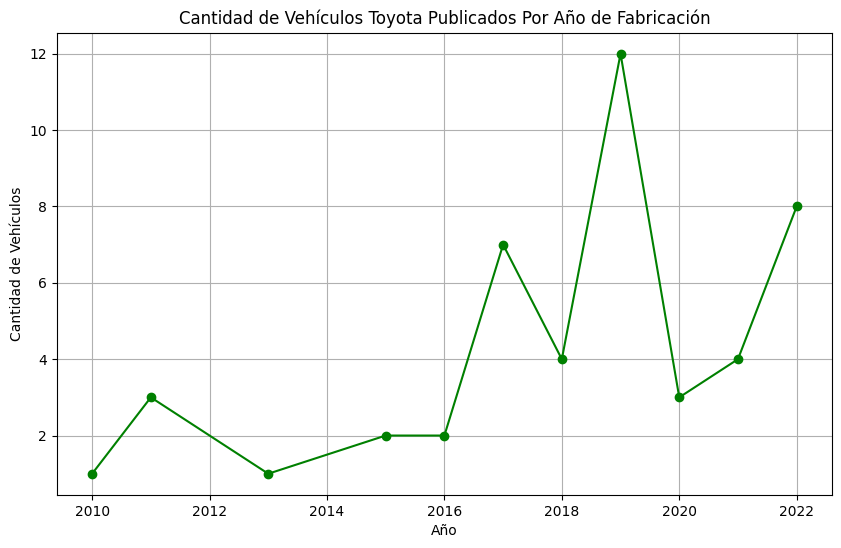

In [ ]:
# Filtrar el DataFrame para incluir solo vehículos de la marca 'Toyota'
df_toyota = df_limpio[df_limpio['brand'] == 'Toyota'].copy()

# Contar la cantidad de vehículos por su año de fabricación
toyota_counts_by_year = df_toyota['year'].value_counts().sort_index()

# Crear un gráfico de líneas de la cantidad de vehículos Toyota por año de fabricación
plt.figure(figsize=(10, 6))
plt.plot(toyota_counts_by_year.index, toyota_counts_by_year.values, marker='o', linestyle='-', color='green')
plt.title('Cantidad de Vehículos Toyota Publicados Por Año de Fabricación')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehículos')
plt.grid(True)
plt.show()

Se trata de identificar la distribucion de una marca particular a traves de lapso de tiempo.
El gráfico muestra los modelos en venta de la marca Toyota. El punto máximo demuestra que existen 12 vehiculos de la marca publicados a la venta que fueron fabricados en el año 2019. En su punto más bajo solo 1 auto del año 2010

##Visualización 2
##⚖️Gráfico de dispersión
Crear un scatter plot que muestre la relación entre dos variables numéricas:
- Personalizar colores y tamaño de puntos
- Agregar etiquetas y título
- Incluir grid para facilitar lectura
- Interpretar la relación observada en markdown


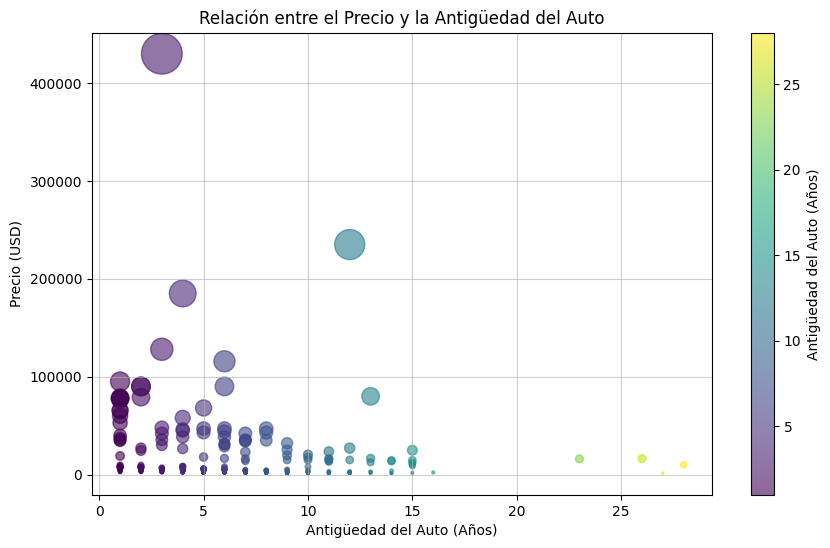

In [ ]:
# Crear un gráfico de dispersión de 'money' vs 'car_age'
plt.figure(figsize=(10, 6))
plt.scatter(df_limpio['car_age'], df_limpio['money'], c=df_limpio['car_age'], cmap='viridis', s=df_limpio['money']/500, alpha=0.6)

# Agregar etiquetas y título
plt.xlabel('Antigüedad del Auto (Años)')
plt.ylabel('Precio (USD)')
plt.title('Relación entre el Precio y la Antigüedad del Auto')

# Agregar grid
plt.grid(True, alpha=0.6)

# Agregar barra de color para la antigüedad
plt.colorbar(label='Antigüedad del Auto (Años)')

# Mostrar el gráfico
plt.show()

El grafico demuestra una tendencia a medida que aumenta la cantidad de años del vehiculo este pierde valor. Tambien se aprecian outliers donde en uno por ej. su antiguedad es cercana al limite de 30 años y el valor es bastante bajo, y otro con baja antiguedad (cercana a 5 años) y un valor muy alto en dolares. Aqui debemos tener en cuenta como dependiendo la marca influye en el valor mas alla del kilometraje.

#Visualización 3

##📊Dashboard de múltiples gráficos
Crear una figura con al menos 4 subplots (2x2) que incluya:
- Al menos 3 tipos diferentes de gráficos (ej: barras, líneas, histograma, scatter)
- Personalización avanzada: colores, estilos, leyendas
- Un título general para toda la figura
- Uso de plt.tight_layout() para organización
##Cada subplot debe:
-	Tener título propio
-	Estar relacionado con el análisis del dataset
-	Aportar información relevante

- Documentar en markdown: Explicar qué historia cuentan estos gráficos en conjunto y qué insights se pueden extraer

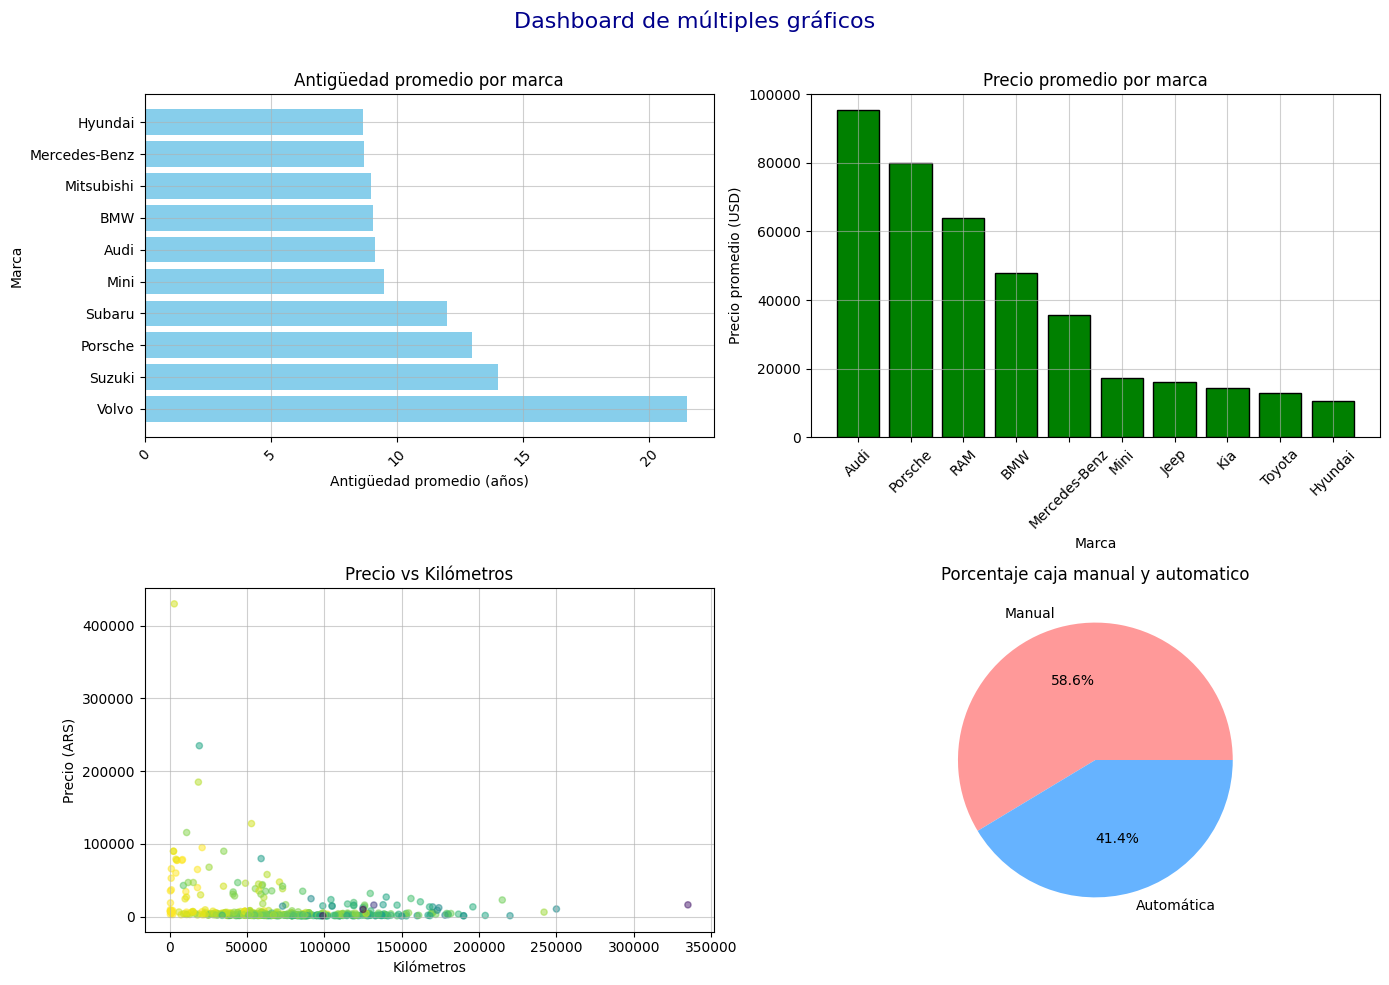

In [ ]:
# Crear la figura con 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Dashboard de múltiples gráficos', fontsize=16, color='darkblue')

# Antigüedad promedio por marca
promedio_antiguedad = df_limpio.groupby('brand')['car_age'].mean().sort_values(ascending=False).head(10)
axes[0,0].barh(promedio_antiguedad.index, promedio_antiguedad.values, color='skyblue')
axes[0,0].set_title('Antigüedad promedio por marca', fontsize=12)
axes[0,0].set_xlabel('Antigüedad promedio (años)')
axes[0,0].set_ylabel('Marca')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.6)

# Precio promedio por marca
promedio_precio = df_limpio.groupby('brand')['money'].mean().sort_values(ascending=False).head(10)
axes[0,1].bar(promedio_precio.index, promedio_precio.values, color='green', edgecolor='black')
axes[0,1].set_title('Precio promedio por marca', fontsize=12)
axes[0,1].set_xlabel('Marca')
axes[0,1].set_ylabel('Precio promedio (USD)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.6)

# Precio vs Kilometros
axes[1,0].scatter(df_limpio['kilometres'], df_limpio['money'], s=20, alpha=0.5, c=df_limpio['year'])
axes[1,0].set_title('Precio vs Kilómetros')
axes[1,0].set_xlabel('Kilómetros')
axes[1,0].set_ylabel('Precio (ARS)')
axes[1,0].grid(True, alpha=0.6)

# Proporcion de tipo de caja de cambios
colores_personalizados = ['#ff9999', '#66b3ff']
tipo_caja = df_limpio['gear'].value_counts()
axes[1,1].pie(tipo_caja.values, labels = tipo_caja.index, autopct='%1.1f%%', colors=colores_personalizados)
axes[1,1].set_title('Porcentaje caja manual y automatico', fontsize=12)

# Ajuste general
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Estos 4 gráficos muestran como se comporta el mercado de automotor. El promedio de antigüedad por marcas. Autos de alta gama se venden con menos kilometraje y a precios más elevados. Tambien demuestra la depreciación del precio debido al kilometraje del auto y una pequeña preferencia a la caja manual sobre la automática.

#PARTE 4: MACHINE LEARNING
##Actividad 1
📋Preparación de datos para ML
- Seleccionar las variables relevantes para el modelo (features y target)
-	Verificar que no haya valores nulos en las variables seleccionadas
-	Dividir los datos en conjunto de entrenamiento y prueba usando train_test_split()
-	Usar 80% entrenamiento, 20% prueba
-	Especificar random_state para reproducibilidad
-	Mostrar las dimensiones de cada conjunto


In [ ]:
# Selección de variables (features y target)
X = df_limpio[['kilometres']]
y = df_limpio['car_age']

# verificación de valores nulos
print("=" * 60)
print("Valores nulos por columna:")
print(df_limpio[['kilometres', 'car_age']].isnull().sum())
print("=" * 60)
# División de los datos para entrenamiento
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split( X, y,
    train_size=0.8, random_state=42
)
# Muestra de dimensiones de conjuntos
print("Cantidad de registros por conjunto:")
print(f"X_entrena: {len(X_entrena)}")
print(f"X_prueba:  {len(X_prueba)}")
print(f"y_entrena: {len(y_entrena)}")
print(f"y_prueba:  {len(y_prueba)}")
print("=" * 60)

Valores nulos por columna:
kilometres    0
car_age       0
dtype: int64
Cantidad de registros por conjunto:
X_entrena: 408
X_prueba:  102
y_entrena: 408
y_prueba:  102


##Actividad 2
##🦾Creación y entrenamiento del modelo
###Elegir UNO de los siguientes según el tipo de problema:

- 📍Regresión Lineal si la variable objetivo es numérica continua
-	Regresión Logística si la variable objetivo es categórica binaria (0/1, Sí/No)
###Realizar:
-	Importar el modelo apropiado de sklearn
-	Crear la instancia del modelo
-	Entrenar el modelo con los datos de entrenamiento usando .fit()
-	Mostrar mensaje de confirmación del entrenamiento


In [ ]:
# Las importaciones sklearn están en el principio del script junto con las otras importaciones

# Regresión Lineal para variable numérica
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_entrena, y_entrena)

# Mensaje de confirmación
print("=" * 60)
print("Modelo de regresión lineal entrenado exitosamente.")
print("=" * 60)


Modelo de regresión lineal entrenado exitosamente.


##🤖Actividad 3
###Realizar un análisis completo del modelo:
📍Para Regresión Lineal:
- Hacer predicciones sobre el conjunto de prueba
- Calcular y mostrar:
-	R² Score
-	Error Cuadrático Medio (MSE)
-	Error Absoluto Medio (MAE)
- Crear una visualización que compare valores reales vs predicciones
- Extraer e interpretar los coeficientes del modelo (pendiente e intercepto)

Para Regresión Logística:
- Hacer predicciones sobre el conjunto de prueba
-	Calcular y mostrar:
-	Accuracy (precisión)
-	Matriz de confusión

-	Hacer predicciones de probabilidad para al menos 3 casos nuevos
-	Crear una visualización que muestre la curva de decisión del modelo

Documentar en markdown:
- Interpretación de las métricas obtenidas
- ¿El modelo es bueno? ¿Por qué?
- ¿Qué significa el resultado en el contexto del problema?
- Limitaciones del modelo
- Posibles mejoras

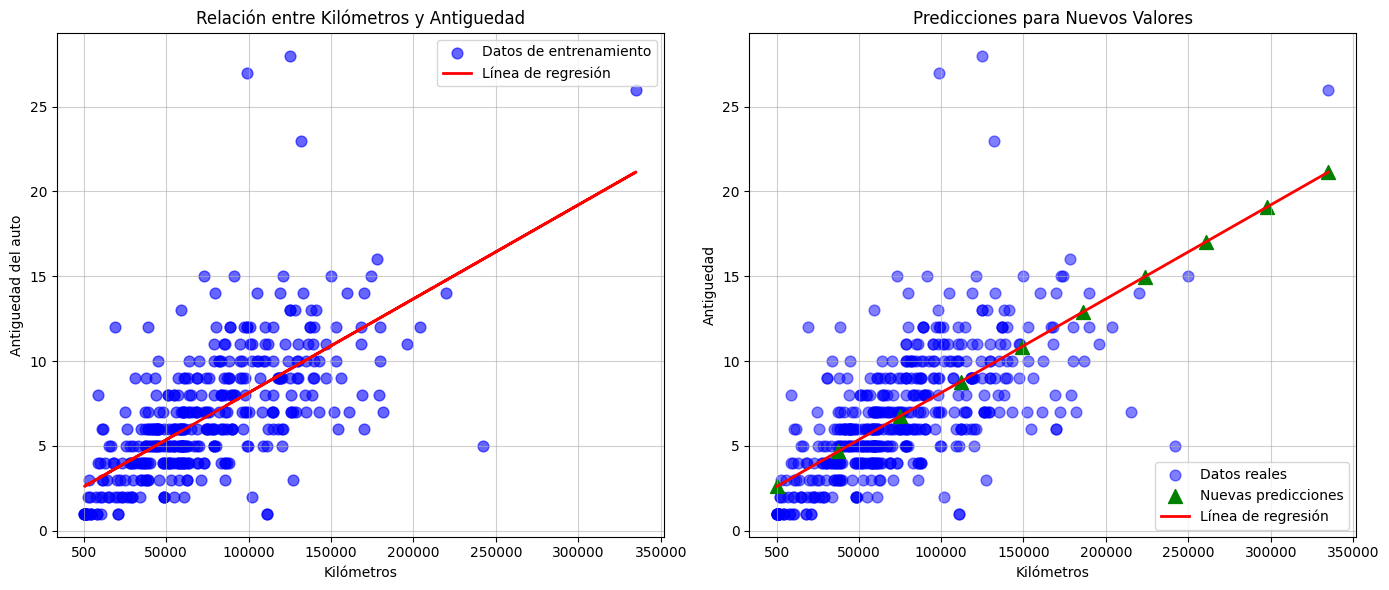

Coeficientes pendiente e intercepto
Pendiente (coeficiente): 0.0001
Intercepto: 2.59


In [ ]:
# Predicciones sobre el conjunto de prueba
Predicciones = modelo.predict(X_prueba)

# Cálculo de métricas
r2 = r2_score(y_prueba, Predicciones)
mse = mean_squared_error(y_prueba, Predicciones)
mae = mean_absolute_error(y_prueba, Predicciones)

# Visualización de comparacion real vs predicción
plt.figure(figsize=(14, 6))

# SUBPLOT 1: Datos de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_entrena, y_entrena, color='blue', s=60, alpha=0.6, label='Datos de entrenamiento')

# Línea de regresión para entrenamiento
y_pred_entrena = modelo.predict(X_entrena)
plt.plot(X_entrena, y_pred_entrena, color='red', linewidth=2, label='Línea de regresión')

plt.xlabel("Kilómetros")
plt.ylabel("Antiguedad del auto")
plt.title("Relación entre Kilómetros y Antiguedad")
plt.xticks([500,50000,100000,150000,200000,250000,300000,350000])
plt.legend()
plt.grid(True, alpha=0.6)

# SUBPLOT 2: Nuevas predicciones
plt.subplot(1, 2, 2)

# Crear nuevos valores de kilometraje para predecir
nuevos_km = np.linspace(df_limpio['kilometres'].min(), df_limpio['kilometres'].max(), 10)
nuevas_predicciones = modelo.predict(pd.DataFrame({'kilometres': nuevos_km}))

# Datos reales
plt.scatter(df_limpio['kilometres'], df_limpio['car_age'], color='blue', s=60, alpha=0.5, label='Datos reales')

# Nuevas predicciones (triángulos verdes)
plt.scatter(nuevos_km, nuevas_predicciones, color='green', s=100, marker='^', label='Nuevas predicciones')

# Línea de regresión extendida
plt.plot(nuevos_km, nuevas_predicciones, color='red', linewidth=2, label='Línea de regresión')

plt.xlabel("Kilómetros")
plt.ylabel("Antiguedad")
plt.title("Predicciones para Nuevos Valores")
plt.xticks([500,50000,100000,150000,200000,250000,300000,350000])
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# Coeficientes del modelo
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print("=" * 60)
print("Coeficientes pendiente e intercepto")
print("=" * 60)
print(f"Pendiente (coeficiente): {pendiente:.4f}")
print(f"Intercepto: {intercepto:.2f}")

In [ ]:
print("=" * 60)
print("RESUMEN DE LA REGRESIÓN LINEAL")
print("=" * 60)
print(f"\n📊 DATOS DE ENTRENAMIENTO:")
print(f"   - Registros totales: {len(df_limpio)}")
print(f"   - Rango de kilómetros: {df_limpio['kilometres'].min():,.0f} - {df_limpio['kilometres'].max():,.0f} km")
print(f"   - Rango de antiguedad: {df_limpio['car_age'].min():,.0f} - {df_limpio['car_age'].max():,.0f} años")
print("=" * 60)
print(f"\n📈 MODELO ENTRENADO:")
print(f"   - Ecuación: Antiguedad = {modelo.coef_[0]:.4f} * Kilómetros + {modelo.intercept_:.2f}")
print(f"   - R² Score: {r2:.4f} ({r2*100:.2f}% de varianza explicada)")
print(f"   - MSE: {mse**0.5:,.2f}")
print(f"   - MAE: {mae:,.2f}")
print("=" * 60)
print(f"\n🎯 EJEMPLO DE PREDICCIÓN:")
km_ejemplo = 500
prediccion = modelo.predict(pd.DataFrame({'kilometres': [km_ejemplo]}))
print(f"   - Para un vehículo con {km_ejemplo:,} km:")
print(f"   - Antiguedad estimada: {prediccion[0]:,.2f} años")
print("=" * 60)

RESUMEN DE LA REGRESIÓN LINEAL

📊 DATOS DE ENTRENAMIENTO:
   - Registros totales: 510
   - Rango de kilómetros: 500 - 335,000 km
   - Rango de antiguedad: 1 - 28 años

📈 MODELO ENTRENADO:
   - Ecuación: Antiguedad = 0.0001 * Kilómetros + 2.59
   - R² Score: 0.5368 (53.68% de varianza explicada)
   - MSE: 2.27
   - MAE: 1.80

🎯 EJEMPLO DE PREDICCIÓN:
   - Para un vehículo con 500 km:
   - Antiguedad estimada: 2.62 años


In [ ]:
print("=" * 60)
print(f"\nCalificación del modelo (R²): {r2:.2f}")
print("=" * 60)
if r2 >= 0.9:
    print(f"→ EXCELENTE: El modelo es muy bueno")
elif r2 >= 0.7:
    print(f"→ BUENO: El modelo funciona bien")
elif r2 >= 0.5:
    print(f"→ REGULAR: El modelo es aceptable")
else:
    print(f"→ MALO: El modelo necesita mejora")
print("=" * 60)




Calificación del modelo (R²): 0.54
→ REGULAR: El modelo es aceptable


#Interpretación de las métricas obtenidas:
- R²: Esto muestra que la variabilidad en la antiguedad solo puede explicarse en un 53.68% mirando los km del vehículo.
- MSE: 2.27
- MAE: 1.80
- MSE y MAE muestran que el margen de error promedio de las predicciones se equivocan 1.8 años y en 2.27 (quizas por los outliers).
estos margenes de error coinciden con el ejemplo de predicción hecho (km_ejemplo) donde como resultado un auto de 500km tendria 2.62 años de antiguedad, mientras que en la base de datos los autos de ese kilometraje tienen mucho menos de un año de antiguedad.

#¿El modelo es bueno? ¿Por qué?
- El modelo es regular con un 53.68%. La relación no es estrictamente lineal puede haber autos viejos con pocos km, autos nuevos con muchos km. El no tener en cuenta otras variables afecta al porcentaje.

#¿Qué significa el resultado en el contexto del problema?
- El modelo muestra que si bien existe una relación entre el kilometraje del auto y su antiguedad no es suficiente para evaluar con precisión. En el contexto del mercado del automotor no se puede predecir a partir de una sola variable.

#Limitaciones:

- Debido a que el mercado de automotor depende de múltiples factores como marca, motor, tipo de caja, modelo, tipo de combustible que usa, etc. Un análisis lineal refleja poco porcentaje de efectividad.
- La regresión lineal asume estrictamente una relación lineal. Aunque si vamos a los gráficos se muestra una tendencia lineal pero dispersión en los datos. Esto sugiere una relación no lineal o la necesidad de incluir más variables numéricas para mejorar el ajuste.

#Posibles mejoras:
- Incluir más variables numéricas la entrenamiento que reflejen mejor el comportamiento en el mercado real, esto generaría un aumento en el r2. Es decir una regresión lineal de múltiples variables, aunque no podría graficarse de la misma forma.
- Usar modelos como árbol de decisiones o random forest para reflejar mejor las relaciones no lineales y de dispersión.